# План работы

1. Изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Портрет пользователя
5. Проверка гипотез
6. Вывод


## Откроем файл с данными и изучим общую информацию

In [130]:
# Импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [131]:
data = pd.read_csv('/datasets/games.csv') # Сохраним таблицу в переменную data

In [132]:
data.head(5) # Для ознакомления выведем первые 20 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [133]:
data.info() #Выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данном разделе мы загрузили необходимые нам библиотеки. Также подгрузили файл с данными, проверили корректность его загрузки и изучили общую информацию о нем.

## Предобработка данных

Для начала приведем названия столбцов к нижнему регистру

In [134]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Тип данных

Вызовем метод `info()` и изучим тип данных в столбцах - при необходимости изменим.

Также выведем первые 5 строк датафрейма, чтобы лучше понимать где стоит изменить тип данных


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [136]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Первое, что бросается в глаза - это тип данных `float` в столбце `year_of_release`. Так как в данном столбце заполнен только год, то преобразуем данный столбец в тип данных `int`. Также в столбце `critic_score`, заметил только целые значения. Если это так, то переведем данный столбец к типу `int`. Изначально проверим столбцы на пропуски, так как если у наст есть пропуски в столбцах, где мы хотим изменить тип данных на `int`, то при преобразовании типов мы будем использовать nullable type `Int64`. Заменять тип данных необходимо для удобства работы и вычислений. Столбец `user_score` преобразуем в `float`.

In [137]:
data['critic_score'].unique() # Изучим и убедимся, в том, что можно преобразовать данный столбец, к формату `int`

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [138]:
data['year_of_release'].unique() # Изучим и убедимся, в том, что можно преобразовать данный столбец, к формату `int`

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [139]:
data['user_score'].unique() # Изучим и убедимся, в том, что можно преобразовать данный столбец, к формату `float`

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце есть значение `tbd`, которое означает - будет определенно позже. Следовательно, данные значения мы смело можем заменить на пропуски.

In [140]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # В парметре errors указываем coerce, чтобы
# неккоректные значения принудительно заменились на `NaN`

In [141]:
data.info() # Проверим, изменился ли тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [142]:
data['user_score'].unique() # Убедимся, что мы избавились от значения tbd

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Пропущенные значения

In [143]:
data.isna().sum() #Найдем общее количество пропущенных значений

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [144]:
#Для лучшей наглядности выведем сразу долю пропусков
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,54.6


В 6 столбцах были обнаружены пропуски:
- `name` - 2 пропуска, которые можно удалить, но для начала ознакомимся с ними;
- `year_of_release` - процент пропусков незначителен, ознакомимся с пропусками;
- `critic_score`, `user_score`, `rating` - слишком большой процент пропусков. Пропуск в данных, скорее всего, связан с недостаточно накопленной статистикой, для проставления рейтинга или оценки.

In [145]:
data[data['name'].isna()] # Вглянем на пропущенные значения в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [146]:
data.shape[0] # Зафиксируем количество строк перед удалением

16715

In [147]:
# Ввиду того, что данные не репрезентативны, то мы просто их удалим
data = data.dropna(subset=['name'])

In [148]:
data.shape[0] # Проверим корректно ли прошло удаление

16713

In [149]:
data[data['year_of_release'].isna()] # Вглянем на пропущенные значения в столбце year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [150]:
# Так как нам важен год для дальнейшей работы, а процент пропусков составляет менее 2%, то мы
# удалим пропущенные значения в столбце `year_of_release`, так как заполнять их медианным или средним значением по
# платформе или названию игрв неккоректно, ввиду того, что релизы могут отличаться по годам
data = data.dropna(subset=['year_of_release'])

In [151]:
data.shape[0] # Проверим корректно ли прошло удаление

16444

In [152]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [153]:
data['rating'].value_counts(dropna=False) # Изучим данные в столбце `rating`

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Для начала разберемся, что значат все эти аббревиатуры.
- `E`- «Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов;
- `M`- «Mature» — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет;
- `T`- «Teen» — «Подросткам»: Игра подходит для лиц от 13 лет и старше;
- `E10+`- «Everyone 10 and older» — «Для всех старше 10 лет»: Возрастная категория — от 10 лет;
- `AO` - «Adults Only 18+» — «Только для взрослых»: Содержание игры только для взрослых;
- `EC` - «Early childhood» — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше;
- `RP` - «Rating Pending» — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.
- `K-A`- «Kids to Adults» — «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Этот рейтинг был заменён на `E` - «Everyone»

Так как аббревиатура `K-A` устаревшая, то заменим ее на `E`. Также ввиду небольшого количества игр в ретинге `EC` и их возрастного ограничения - их можно объединить с рейтингом `E`. Также предлагаю 1 игру с рейтингом `AO` внести в рейтинг `M`, так как по мне разница в 1 год очень "размыта". Также посомтрим, что за игра с рейтингом `RP`. А все пропущенные значения поменяем на `unrated`.

In [154]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data.loc[data['rating'] == 'AO', 'rating'] = 'M'

In [155]:
data[data['rating'] == 'RP'] # Посмотрим, что за игра с рейтингом RP

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP


In [156]:
data.loc[data['rating'] == 'RP', 'rating'] = 'E10+' # Данной игре организация ESRB присвоила рейтинг E10+

In [157]:
data['rating'] = data['rating'].fillna('unrated') # Все пропущенные значения заменим на `unrated`

Что касается столбцов `user_score` и `critic_score`, тут мы лучше оставим пустые значения как есть, так как заменять их каким либо показателем будет неккоректно, ввиду того, что каждая игра на любой из платформ имеет разный рейтинг, на который влияет множество факторов.

### Дубликаты

Проверим наши данные на наличие явных и неявных дубликатов.

In [158]:
data.duplicated().sum() # Явных дубликатов в данных

0

In [159]:
# Посмотрим на наличие неявных дубликатов которые могут оказаться в паре 'name - platform'
data[data.duplicated(subset=['name', 'platform'])] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


In [160]:
# Поочередно изучим данные дубликаты
data.query('name == "Need for Speed: Most Wanted" and platform == "X360"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T


Игра Need for Speed: Most Wanted та приставку Xbox 360 вышла в 2012 году. Поэтому просумируем значения столбцов с продажами по данным дубликатам и оставим только 1 строку, где дата выпуска соответствует правде.

In [161]:
# Воспользуемся циклом, переведем значения нужных столбцов в строку и сохраним в переменных
l1 = data.loc[1190, 'na_sales':'other_sales'].tolist() 
l2 = data.loc[1591, 'na_sales':'other_sales'].tolist()
l_new=[] 

for i in range(len(l1)):
    t=0
    t=l1[i]+l2[i]
    l_new.append(t)
    
l_new # Проверим корректнось сумирования

[1.62, 0.91, 0.03, 0.25]

In [162]:
# Теперь заменим значения на полученные и проверим результат
data.loc[1190, 'na_sales':'other_sales'] = l_new
data.query('name == "Need for Speed: Most Wanted" and platform == "X360"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,1.62,0.91,0.03,0.25,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T


In [163]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16444'

In [164]:
# Удалим ненужную строку
data = data.drop(index=1591)

In [165]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16443'

Теперь повторим действия для остальных дубликатов.

In [166]:
data.query('name == "Need for Speed: Most Wanted" and platform == "PC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82,8.5,T


In [167]:
# На PC игра вышла в 2005 году
l1 = data.loc[5972, 'na_sales':'other_sales'].tolist() 
l2 = data.loc[11715, 'na_sales':'other_sales'].tolist()
l_new=[] 

for i in range(len(l1)):
    t=0
    t=l1[i]+l2[i]
    l_new.append(t)
    
l_new[1] = l_new[1].round(2)
l_new# Проверим корректнось сумирования

[0.02, 0.29, 0.0, 0.06]

In [168]:
# Теперь заменим значения на полученные и проверим результат
data.loc[5972, 'na_sales':'other_sales'] = l_new
data.query('name == "Need for Speed: Most Wanted" and platform == "PC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.29,0.0,0.06,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82,8.5,T


In [169]:
# Удалим ненужную строку
data = data.drop(index=11715)

In [170]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16442'

In [171]:
data.query('name == "Madden NFL 13" and platform == "PS3"') # Значение в дублирующей строчке не значительно,
# поэтому обработаем в ручную и после удалим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [172]:
data.loc[604, 'eu_sales'] = 0.23

In [173]:
# Удалим ненужную строку
data = data.drop(index=16230)

In [174]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16441'

In [175]:
# После удаления обновим индексы
data = data.reset_index(drop=True)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unrated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unrated


In [176]:
len(data['name'].unique())

11426

Количество уникальных значений в столбце `name` - 11 426. Найти неявные дубликаты будет крайне сложно, даже невозможно, поэтому оставим этот столбец как есть.

In [48]:
data['genre'].unique() # Проверим на неявные дубликаты столбец genre

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [49]:
data['platform'].unique() # Проверим на неявные дубликаты столбец platform

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Аномальные значения

Аномальные значения могут содержаться в любых данных, которые можно измерить.

In [50]:
data.describe() #Посмотрим разброс значений в датафреме и тем самым найдем максимально явные аномалии

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,7980.000000,7460.000000
mean,2006.485676,0.264061,0.145957,0.078501,0.047602,68.989223,7.126180
std,5.875735,0.818491,0.506773,0.311127,0.188027,13.920148,1.499461
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Каких то аномалий не замечено, все значения в рамках нормы. Создадим отдельный столбец `ttl_sales`, который заполним суммарными продажами во всех регионах.

In [51]:
# data['ttl_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [52]:
data['ttl_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [53]:
data.head() # Проверим корректность создания нового столбца

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unrated,31.38


In [54]:
data.describe() #Еще раз взглянем на описание

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,ttl_sales
count,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,7980.000000,7460.000000,16441.000000
mean,2006.485676,0.264061,0.145957,0.078501,0.047602,68.989223,7.126180,0.536121
std,5.875735,0.818491,0.506773,0.311127,0.188027,13.920148,1.499461,1.558989
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


В столбце `ttl_sales` минимальное значение составляет 0, что можно отнести к аномалиям. Взглянем на данные строчки.

In [55]:
data[data['ttl_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
16402,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,<NA>,NaN,unrated,0.0
16435,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,<NA>,NaN,unrated,0.0


У данных игр полностью отсутствуют продажи, или значения настолько низкие, что приравниваются к 0, так как мы измеряем в миллионах копиях. Избавимся от этих игр.

In [56]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16441'

In [57]:
data = data[data['ttl_sales'] != 0]

In [58]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16439'

Теперь убедимся, что мы удалилил не более 5% дата фрейма. Изначально у нас было 16 715 строк.

In [59]:
display(f'В общей сложности мы удалили приблизительно {1-len(data)/16715:.1%}')

'В общей сложности мы удалили приблизительно 1.7%'

В данном разделе мы изучили датафрейм на пропуски, дубликаты и аномалии. Данные, которые могли бы повлять на качество анализа, без возможности восстановления, мы удалили. Остальные отклонения обработали и привели данные к нужному типу нам данных для удобства работы с ними.

## Исследовательский анализ данных

В данном разделе мы посмотрим, сколько игр выпускалось в разные годы и как менялись продажи по платформам. Как жанр игры влияет на  продажи и популярность.
На основании изученных данных построим прогноз на 2017 год.

### Обзор и фильтрация данных

Изучим количесвто выпускаемых игр за каждый год. За дату выпуска игры, возьмем дату первого релиза данной игры на одну из платформ, то есть если игра была выпущена в 2000 году на PC, то выпуск ее на другую приставку или в другой год, мы уже учитывать не будет, так как это будет просто адптация, но игра уже не новая. 

Для найдем дубликаты в паре 'name - year_of_release'. Далее отсортируем полученный датафрейм. Так как данные у нас будут отсортированы по возрастанию, то найдем все дубликаты в названиях игр, и оставим только первые значения.

In [60]:
data[data.duplicated(subset=['name', 'year_of_release'])] # Взглянем на дубликаты и их количество

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M,12.63
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94,6.3,M,10.61
...,...,...,...,...,...,...,...,...,...,...,...,...
16417,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unrated,0.01
16418,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16436,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unrated,0.01
16439,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,unrated,0.01


In [61]:
display(f'Строк в data: {data.shape[0]}')

'Строк в data: 16439'

In [62]:
data_name_year = data.drop_duplicates(subset=['name', 'year_of_release']) 

In [63]:
display(f'Строк в data_name_year: {data_name_year.shape[0]}')

'Строк в data_name_year: 12194'

In [64]:
data_name_year = data_name_year.sort_values('year_of_release')
data_name_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
5282,Freeway,2600,1980,Action,0.32,0.02,0.0,0.00,<NA>,NaN,unrated,0.34
542,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,<NA>,NaN,unrated,2.76
2612,Boxing,2600,1980,Fighting,0.72,0.04,0.0,0.01,<NA>,NaN,unrated,0.77
6201,Bridge,2600,1980,Misc,0.25,0.02,0.0,0.00,<NA>,NaN,unrated,0.27
3964,Ice Hockey,2600,1980,Sports,0.46,0.03,0.0,0.01,<NA>,NaN,unrated,0.50


In [65]:
data_name_year.duplicated('name').sum()

769

In [66]:
data_name_year = data_name_year.drop_duplicates('name')

In [67]:
display(f'Строк в data_name_year: {data_name_year.shape[0]}')

'Строк в data_name_year: 11425'

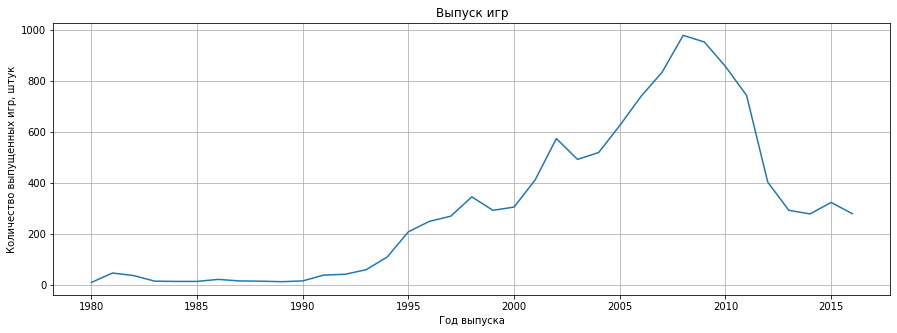

In [68]:
# Визуилизируем данные
data_name_year.pivot_table(index='year_of_release', values='name',aggfunc='count').plot(
    grid=True,
    figsize=(15,5),
    xlabel='Год выпуска',
    ylabel='Количество выпущенных игр, штук',
    legend=False
)
plt.title('Выпуск игр')
plt.show()

Исходя из полученного графика, видно постепенное увелечение производства игр, которе связано с развитием технологий. Самый пик по количеству выпущенных игр пришелся на 2008-2009 год, а далее наблюдаем снижение данного покзателя. Данное снижение можно связать с "подходом" к производству игр. Многие студии разраблотки игр сделали упор на качество игр, а не на их количество. Также можно обосновать тем, что большинство игр поддерживают он-лайн мультиплеер, в связи с чем студии выгоднее выпускать обновления для игры, нежели разрабатывать новую игру.

In [69]:
# Изучим количество продаж по каждой платформе
data.pivot_table(index='platform', values='ttl_sales', aggfunc='sum').sort_values('ttl_sales') 

,ttl_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


Исходя из полученных данных в топ 10 по количеству проданных игр входят на первый взгляд разные приставки, но тут стоит учитывать тот фактор, что эти приставки могут быть модификациями своих "старших братьев", как например, PS, PS2, PS3. Тут очень многое зависит от того, когда была выпущена приставка и как быстро под нее апдатировался рынок, а также как пользователь принял эту приставку.

In [70]:
# Создадим сводную таблицу, в которой отобразим количество продаж игр по платформам в разрезе по годам и сохраним данные 
# в переменную data_pivot_year_platform
data_pivot_year_platform = data.pivot_table(index='year_of_release', columns='platform', values='ttl_sales',aggfunc='sum')
data_pivot_year_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


При изучении таблицы, была замечена аномалия в платформе DS в 1985 году, хотя платформа вышла в 2004 году. Посмотри на аномалию и при возможности обработаем.

In [71]:
data.query('platform == "DS" and year_of_release == 1985')
# Данная игра была выпущена в 2010 году, поэтому просто заменим год

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
15702,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,unrated,0.02


In [72]:
data.loc[15702, 'year_of_release'] = 2010

In [73]:
# Перезапишем переменную data_pivot_year_platform
data_pivot_year_platform = data.pivot_table(index='year_of_release', columns='platform', values='ttl_sales',aggfunc='sum')

In [74]:
# Изучим, сколько в среднем держится платформа на рынке игр
data_pivot_year_platform.count().sort_values()

platform
GG       1
PCFX     1
TG16     1
3DO      2
SCD      2
WS       3
NG       4
PS4      4
XOne     4
WiiU     5
GEN      5
3DS      6
SAT      6
PSV      6
GC       7
N64      7
DC       7
GBA      8
XB       9
SNES    10
2600    10
DS      10
PS      10
PS3     11
Wii     11
PS2     12
NES     12
X360    12
PSP     12
GB      13
PC      26
dtype: int64

В среднем приставка на рынке держится около 10 лет. Данный вывод можно сделать исходя из полученных значений по популярным приставкам, таким как PS, PS2, PS3, Wii, XB, X360. Все что меньше - это либо приставка, которая еще актуальна на данный момент времени, или та приставка, которая была выпущена до 2000 годов, и не получила спрос среди игроков. 

In [75]:
# Cоздадим временную пременную, в которой сохраним Топ 5 платформ по проданным копиям
tmp = data.pivot_table(index='platform', values='ttl_sales', aggfunc= 'sum').sort_values('ttl_sales', ascending=False) 
tmp_top5 = tmp.index[:5].tolist()
tmp_top5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

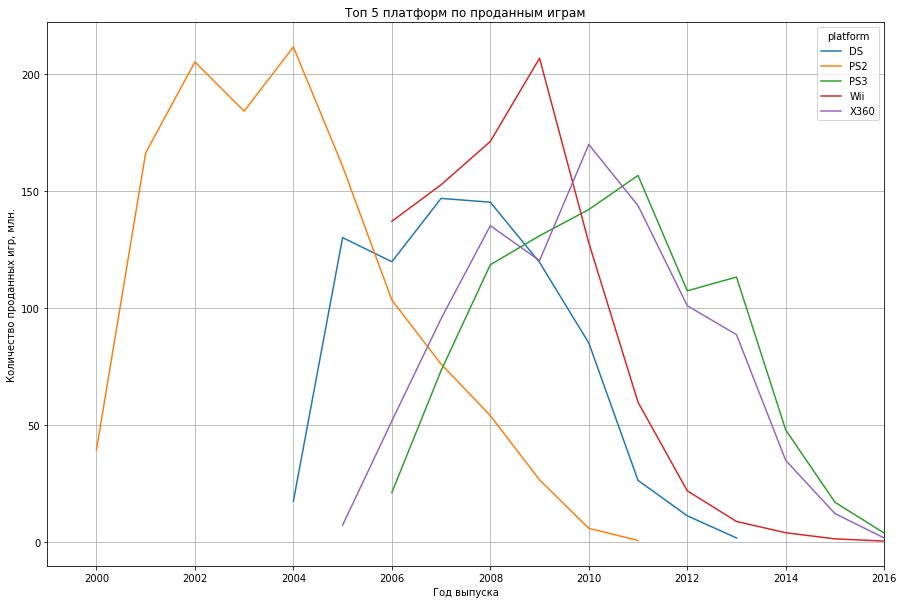

In [76]:
# Возьмем топ 5 по платформам с наибольшими продажами и построим распределение по годам

(
    data.query('platform in @tmp_top5').
    pivot_table(index='year_of_release', columns='platform', values='ttl_sales',aggfunc='sum').
    plot(figsize=(15,10), 
         grid=True,
         xlim=(1999,2016),
         xlabel='Год выпуска',
         ylabel='Количество проданных игр, млн.',
        )
)
plt.title('Топ 5 платформ по проданным играм')
plt.show()

При визуализации как раз можно отследить срок "жизни" топ 5 приставок и их пик популярности. Этот граффик еще раз подтверждает тот факт, что приставка живет в среднем 10 лет, а ее пик приходится через 2-3 года после выхода. Исключение - это персональный компьютер, который модифицируется, заменой "внутренностей".

### Анализ на основе актуальных данных

Для анализа рынка берем данные которые старше за последние 3 года, так индустрия компьютерных игра динамично развивается. В связм с чем создадим переменную `data_actual`, с которой будем работать в дальнейшем.

In [77]:
data_actual = data.query('year_of_release >= 2014')

In [78]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unrated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unrated,7.98


Изучим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [79]:
# Посмотрим какие платформы остались начиная с 2014 года
data_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [80]:
# Исключим платформы, которые "отжили свое", то есть которых уже нет в 2016 году и оставим только актуальные
tmp = data_actual[data_actual['year_of_release'] == 2016]['platform'].unique()
tmp

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

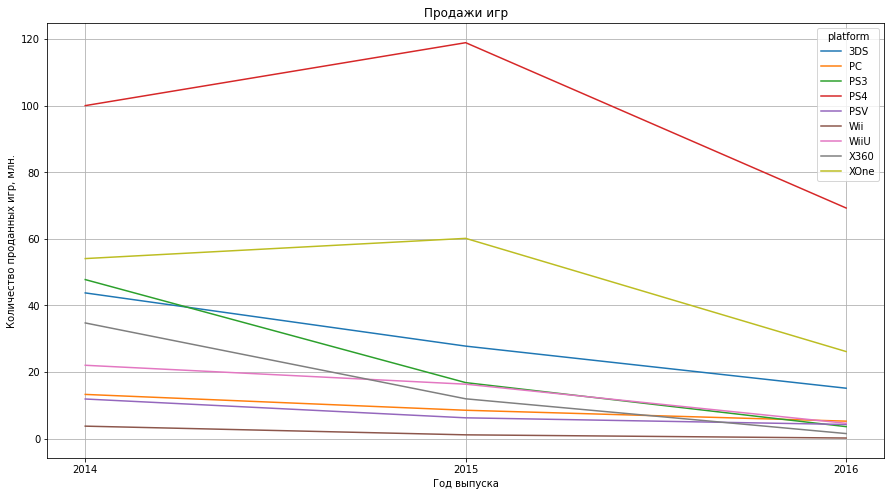

In [81]:
# Используя полученные платформы построи график, в котором мы сможем определить потенциально прибыльную платформу
(
    data_actual.query('platform in @tmp').
    pivot_table(index='year_of_release', columns='platform', values='ttl_sales',aggfunc='sum').
    plot(figsize=(15,8), 
         grid=True,
         xlabel='Год выпуска',
         ylabel='Количество проданных игр, млн.',
         
        )
)
plt.xticks([2014,2015,2016])
plt.title('Продажи игр')
plt.show()

Исходя из полученного графика можно сделать следующий вывод по платформам:
- `3DS` - идет плавный спад по продажам игр, исходя из личного опыта, портативные консоли пользуются меньшей популярностью. Как такового пика продаж не было. Я бы не относил данную консоль к потенциально прибыльной;
- `PC` - как я говорил ранее, персональный компьютер не имеет аналогов на рынке, ввиду того, что он постоянно модернизируется, за счет замены компонентов, следовательно будет актуален всегда. Небольшие продажи по можно связать с особенностью игр на данном устройстве. Например, возьмем Online MMORPG, которые по сути бесплатны для пользователя, но там существует внутриигровой рынок или же необходимо купить "подписку", для того, чтобы играть. В связи с чем платных игр на компьютер меньше;
- `PS3` - переживает сильный спад на рынке, ввиду того, что появилась новая версия данной консоли - `PS4`, которая в 2015 году находилась на пике продаж, и исходя их того что "срок жизни" приставок примерно 10 лет, то можно сделать вывод, что данная консоль будет актуальна еще минимум лет 7;
- `PSV` - потенциально не прибыльная консоль, ввиду небольших сумм по продажам и на данный момент идет на спад;
- `Wii` - поддержка данной консоли была прекращена в 2013 году, следовательно она "доживает" свое с ранее выпущенными играми;
- `WiiU` - портативная консоль от Nintendo, которая как видно из графика, не "зашла" пользователям, на что указывает отсутствие пика продаж, небольшой "жизненный цикл" и спад продаж;
- `X360` - консоль, которая "отжила свое" и ей на смену пришла новая версия - `XOne`, которая находится, несмотря на спад по продажам, в самом "расцвете" сил.

В итоге можно выделить только 3 потенциально прибильные платформы, а именно: `PS4`, `XOne`, `PC`.

Посмотрим как распредделены продажи игр по миру в разбивке по потенциально прибыльным платформам. Для этого построим диаграмму размаха.

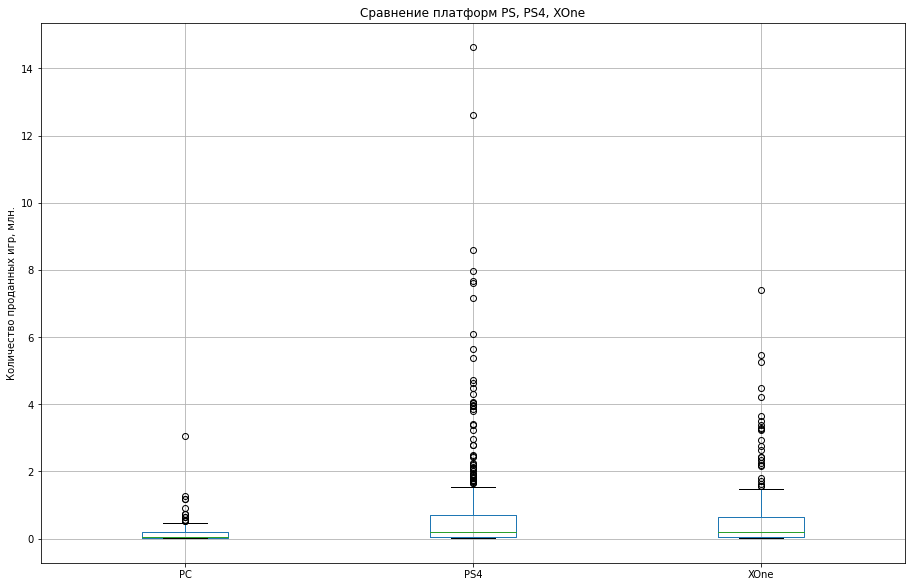

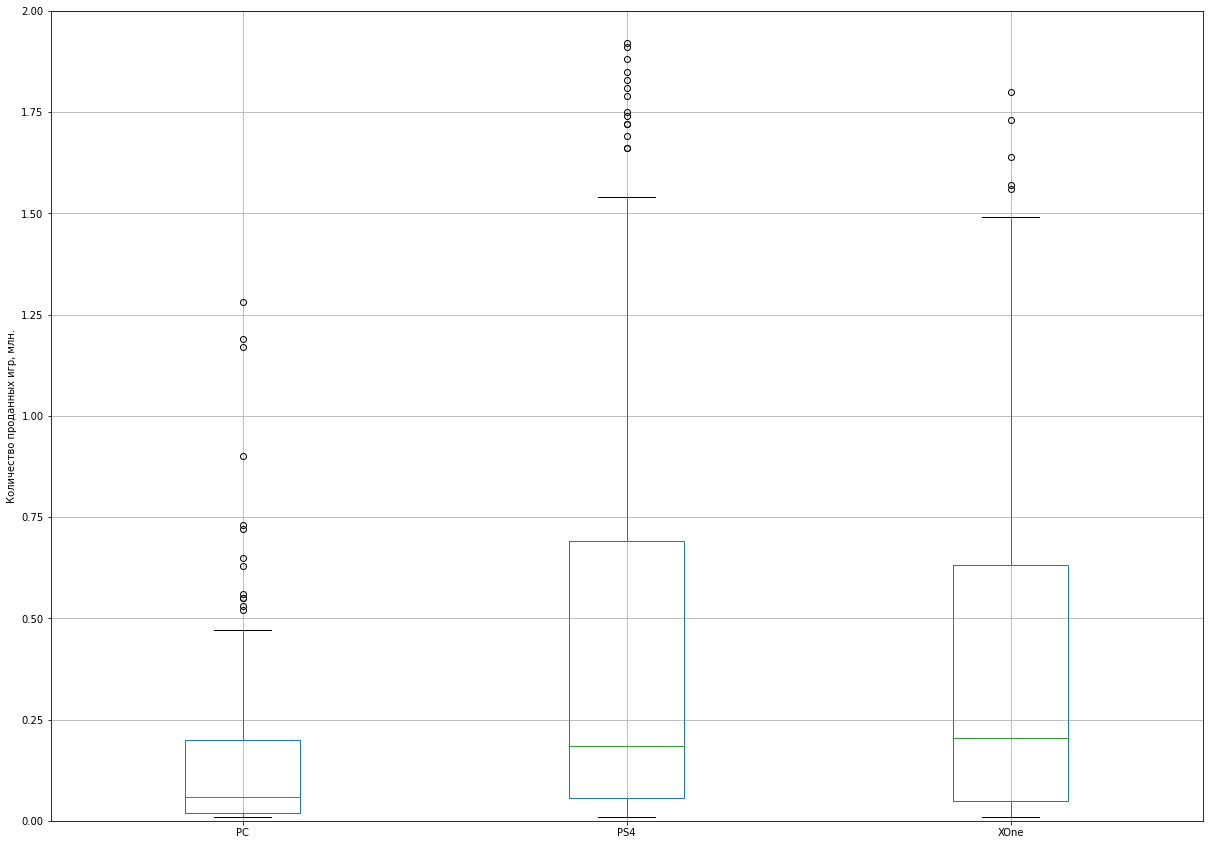

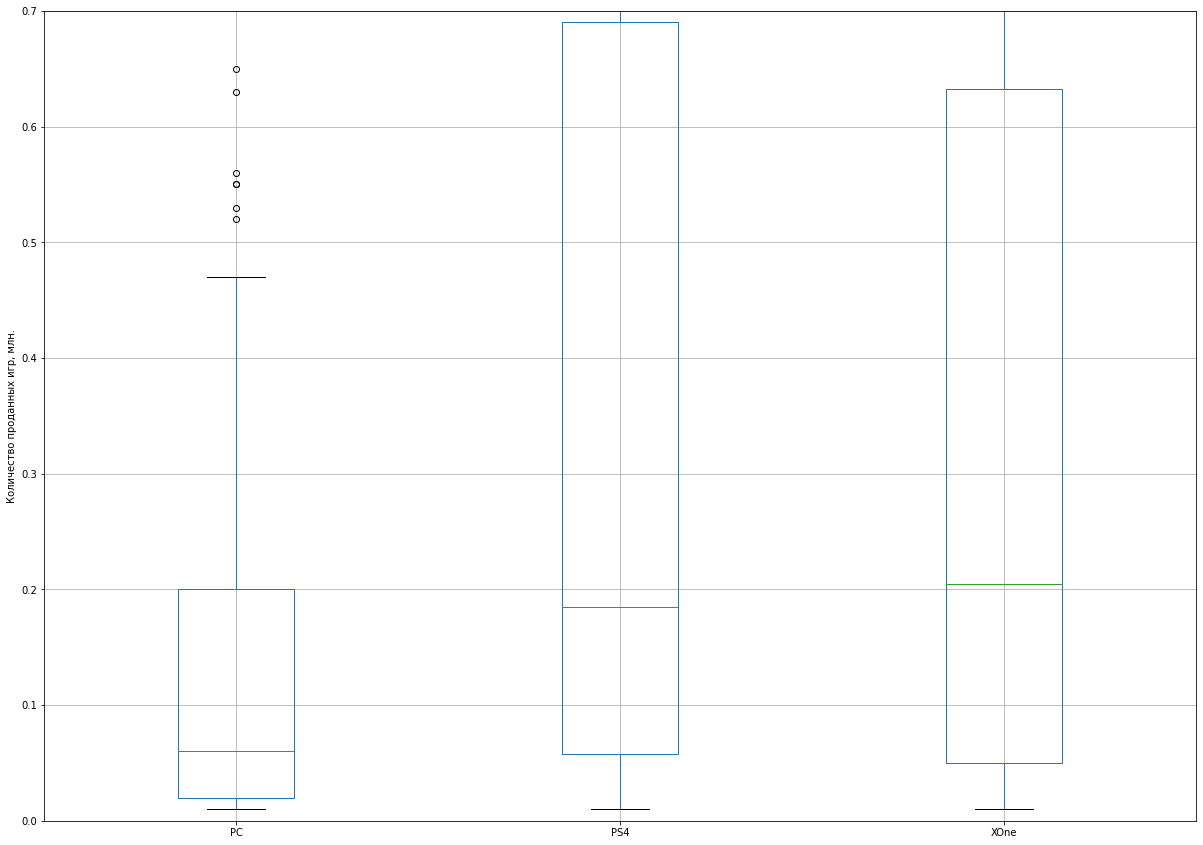

In [82]:
(
    data_actual.query('(platform == "PS4" or platform == "XOne" or platform == "PC") and year_of_release >= 2013').
    boxplot(column='ttl_sales', 
            by='platform', 
            figsize=(15,10)
           )
)
plt.title('Сравнение платформ PS, PS4, XOne')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

# Приблизим граффик

(
    data_actual.query('(platform == "PS4" or platform == "XOne" or platform == "PC") and year_of_release >= 2013').
    boxplot(column='ttl_sales', 
            by='platform', 
            figsize=(20,15)
           )
)
plt.ylim(0,2)
plt.title('')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

(
    data_actual.query('(platform == "PS4" or platform == "XOne" or platform == "PC") and year_of_release >= 2013').
    boxplot(column='ttl_sales', 
            by='platform', 
            figsize=(20,15)
           )
)
plt.ylim(0,0.7)
plt.title('')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

#(
#   data_actual.query('(platform == "PS4" or platform == "XOne" or platform == "PC") and year_of_release >= 2013').
#   pivot_table(index='platform', values='ttl_sales', aggfunc=('sum', 'count')).
#   sort_values('sum', ascending=False)
#)


Исходя из полученных графиков можно заметить, что медианное значение проданных копий у приставки XOne примерно на 0.02 выше, чем у PS4. При этом разброс значений у PS4, на 0.05 больше, на что указывает 75 квартиль. Выбросы у платформ могут быть связаны с ожидаемыми играми или эклюзивами, на ту или иную приставку, которые скупают по всему миру. Медианное значение PC гораздо ниже, чем у приставок, и не превышает 10 000 проданных копий.

Посмотрим, как влияют на продажи внутри одной популярной платформы, внашем случае `PS4`, отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

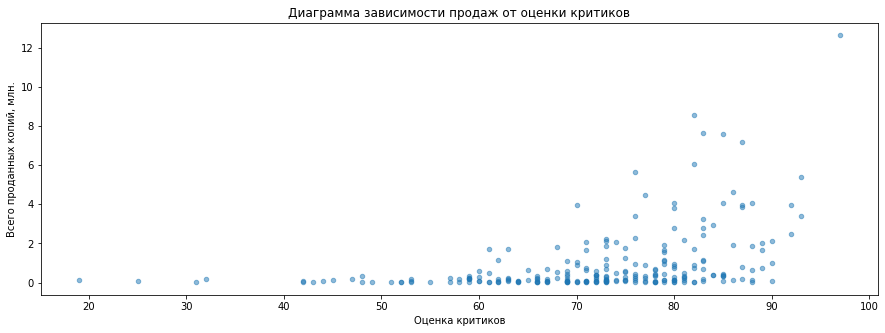

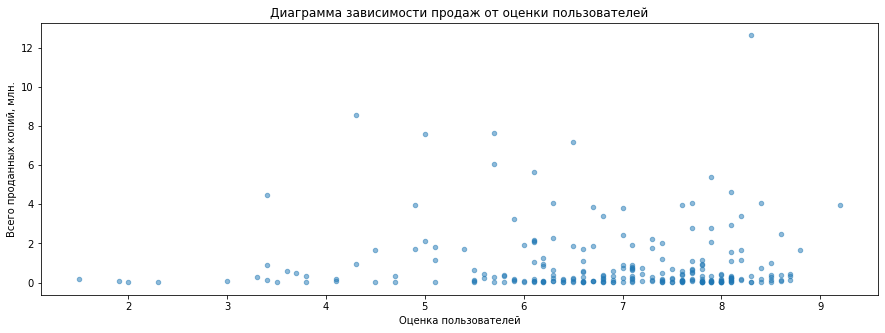

In [83]:
#Для диаграммы рассеяния укажим коэфициент alpha равным 0.5, чтобы лучше увидеть плотность
(
    data_actual.query('platform == "PS4"').
    plot(kind='scatter',
         y='ttl_sales',
         x='critic_score',
         alpha=0.5,
         xlabel='Оценка критиков',
         ylabel='Всего проданных копий, млн.',
         figsize=(15,5)
        )
)
plt.title('Диаграмма зависимости продаж от оценки критиков')
plt.show()

(
    data_actual.query('platform == "PS4"').
    plot(kind='scatter',
         y='ttl_sales',
         x='user_score',
         alpha=0.5,
         xlabel='Оценка пользователей',
         ylabel='Всего проданных копий, млн.',
         figsize=(15,5)
        )
)
plt.title('Диаграмма зависимости продаж от оценки пользователей')
plt.show()

Посчитаем корреляцию между отзывами и продажами на платформах PS4, XOne и PC.

In [84]:
data_actual.query('platform == "PS4"')[['ttl_sales', 'critic_score', 'user_score']].corr()

,ttl_sales,critic_score,user_score
ttl_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


In [85]:
data_actual.query('platform == "XOne"')[['ttl_sales', 'critic_score', 'user_score']].corr()

,ttl_sales,critic_score,user_score
ttl_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


In [86]:
data_actual.query('platform == "PC"')[['ttl_sales', 'critic_score', 'user_score']].corr()

,ttl_sales,critic_score,user_score
ttl_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


Исходя из полученных результатов коэффициентов корреляции и диаграмм, можно сказать что оценки критиков демонстрируют прямую, средне-слабую корреляцию с количеством продаж. Оценки пользователей корреляции с продажами не имеют. 
Игры слишком разнообразны, и находят отклик далеко не у всех пользователей и критиков, так например, пользователи могут ожидать выпуск определенной игры, и скупить много копий в первый день продаж, но игра может выйти "сырой", что очень сильно повлияет на оценку. Поэтому данный вывод можно отнести к любой платформе и любой игре.

Посмотрим на общее распределение игр по жанрам.

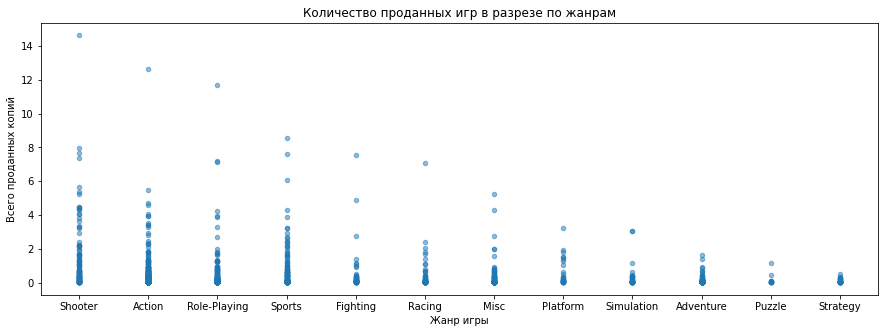

In [87]:
(
    data_actual.
    plot(kind='scatter',
         y='ttl_sales',
         x='genre',
         alpha=0.5,
         xlabel='Жанр игры',
         ylabel='Всего проданных копий',
         figsize=(15,5)
        )
)
plt.title('Количество проданных игр в разрезе по жанрам')
plt.show()

In [88]:
# Теперь посмотрим медианные и средние значения продаж по жанрам
(
data_actual.pivot_table(index='genre', values='ttl_sales', aggfunc=('median', 'mean')).
sort_values('median', ascending=False)
)

,mean,median
genre,,
Shooter,1.335469,0.515
Sports,0.680000,0.180
Platform,0.476053,0.140
Fighting,0.470333,0.125
Role-Playing,0.459005,0.110
Simulation,0.298409,0.100
Action,0.322068,0.090
Misc,0.332301,0.090
Racing,0.398841,0.090


Исходя из полученных данных можно сказать, что самый прибыльный жанр - это Shooter. Обычно этот жанр раскупается в 515 тысяч копий, что минимум в 2.8 раз меньше чем в других жанрах. К неприбыльным жанрам я бы отнес те жанры, медианные продажи, которых не превышают 90 тысяч копий.

## Портер пользователя

Определим портрет пользователя каждого региона (NA, EU, JP).

Для начала найдем топ 5 популярных платформ по продажам игр в каждом регионе.

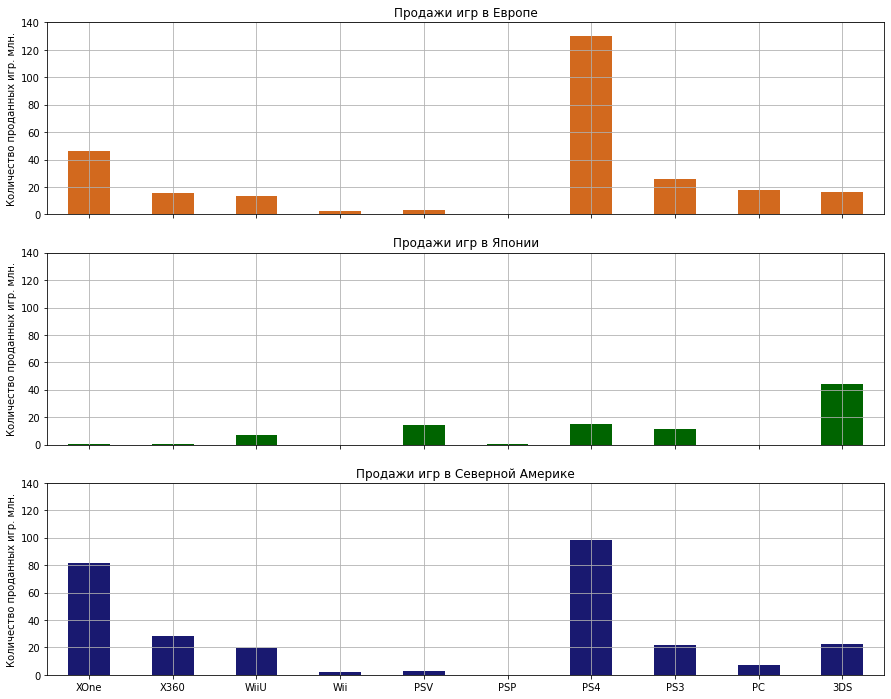

In [89]:
(
    data_actual.pivot_table(index='platform', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum').
    sort_values('platform', ascending=False).
    rename(
        columns={
            'eu_sales': 'Продажи игр в Европе',
            'na_sales': 'Продажи игр в Северной Америке',
            'jp_sales': 'Продажи игр в Японии'
        }
    ).
    plot(
        kind='bar',
        figsize=(15,12),
        legend=False,
        color=['#D2691E', '#006400', '#191970'],
        rot=0,
        subplots=True,
        grid=True,
        xlabel='',
        ylabel='Количество проданных игр. млн.',
        ylim=(0,140)
    )
)
plt.show()

Исходя из полученных графиков можно выделить топ 5 игровых платформ в каждом регионе:
- В Европе преобладает приставка PS4, далее идут XOne, PS3, PC и Nintendo 3DS;
- В Японии большой популярностью пользуется приставка Nintendo 3DS, что обусловленно менталитетом японцев, ввиду того, что они большую часть жизни находятся на работе, и поиграть дома сложнее, чем в пути на работу. Далее идут приставки PS4, PS Vita, PS3 и WiiU. В итоге в топ 5 входит 3 портативные приставки;
- В Северной Америке преобладает приставка PS4. Более ярко выраженным спросом пользуется приставка XOne, ввиду того что данная консоль выпущена американской компанией, и по большей части адаптирована на американский рынок. Далее идут X360, 3DS и PS3. 

Теперь посмотрим как те или жанры преобладают в разных регионах. Для этого построим круговую диаграмму.

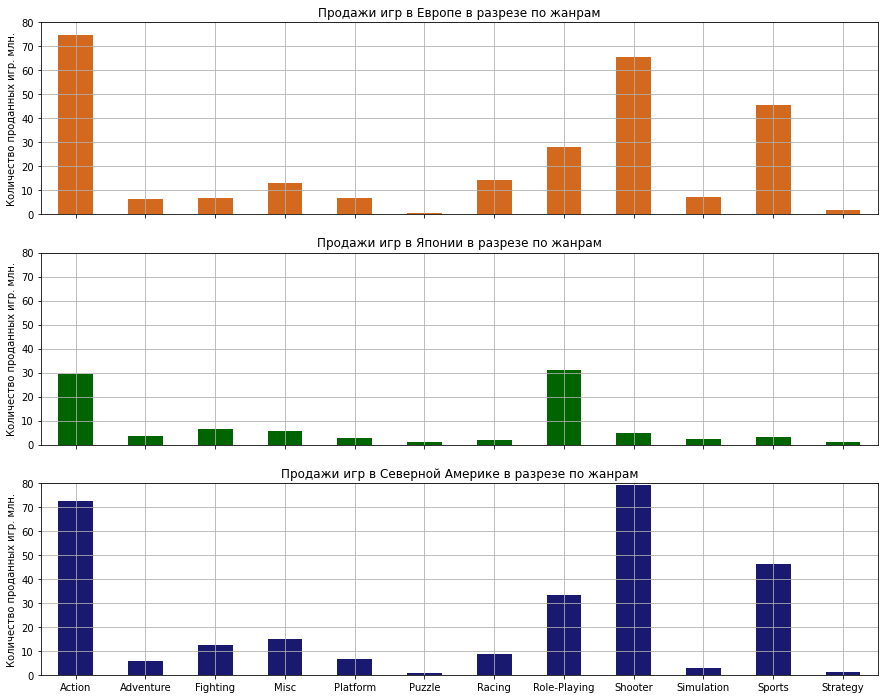

In [90]:
(
    data_actual.pivot_table(index='genre', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum').
    sort_values('genre').
    rename(
        columns={
            'eu_sales': 'Продажи игр в Европе в разрезе по жанрам',
            'na_sales': 'Продажи игр в Северной Америке в разрезе по жанрам',
            'jp_sales': 'Продажи игр в Японии в разрезе по жанрам'
        }
    ).
    plot(
        kind='bar',
        figsize=(15,12),
        legend=False,
        color=['#D2691E', '#006400', '#191970'],
        rot=0,
        subplots=True,
        grid=True,
        xlabel='',
        ylabel='Количество проданных игр. млн.',
        ylim=(0,80)
    )
)
plt.show()

In [91]:
'''(
    data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').
    sort_values('eu_sales').
    plot(
        kind='pie',
        y='eu_sales',
        figsize=(10,10),
        autopct='%1.0f%%',
        legend=False,
        explode = [0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.05],
        ylabel=''
    )
)
plt.title('Продажи игр в Европе в разрезе по жанрам')
plt.show()

(
    data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').
    sort_values('jp_sales').
    plot(
        kind='pie',
        y='jp_sales',
        figsize=(10,10),
        autopct='%1.0f%%',
        legend=False,
        explode = [0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.05],
        ylabel=''
    )
)
plt.title('Продажи игр в Японии в разрезе по жанрам')
plt.show()

(
    data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').
    sort_values('na_sales').
    plot(
        kind='pie',
        y='na_sales',
        figsize=(10,10),
        autopct='%1.0f%%',
        legend=False,
        explode = [0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.05],
        ylabel=''
    )
)
plt.title('Продажи игр в Северной Америке в разрезе по жанрам')
plt.show()'''

"(\n    data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\n    sort_values('eu_sales').\n    plot(\n        kind='pie',\n        y='eu_sales',\n        figsize=(10,10),\n        autopct='%1.0f%%',\n        legend=False,\n        explode = [0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.05],\n        ylabel=''\n    )\n)\nplt.title('Продажи игр в Европе в разрезе по жанрам')\nplt.show()\n\n(\n    data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\n    sort_values('jp_sales').\n    plot(\n        kind='pie',\n        y='jp_sales',\n        figsize=(10,10),\n        autopct='%1.0f%%',\n        legend=False,\n        explode = [0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.05],\n        ylabel=''\n    )\n)\nplt.title('Продажи игр в Японии в разрезе по жанрам')\nplt.show()\n\n(\n    data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').\n    sort_values('na_sales').\n    plot(\n        kind='pie',\n        y='na_sales',\n        figs

Распределение продаж по жанрам в Северной Америке и Европе практически идентичны. Первые места занимают `Action` и `Shooter`. Далее идет `Sport`. Можно еще отметить `Role-Playing`, `Fighting` и `Racing`.

В Японии наоборот преобладают игры жанра `Role-Playing`, что обусловлено образом жизни японцев, так как они больше проводят времени в интеренете. `Racing` и `Shooter` - совсем не пользуются спросом. Второе место занимает `Action`, далее `Fighting` и `Misc`.

Посмотрим влияет ли рейтинг ESRB на продажи в регионах.

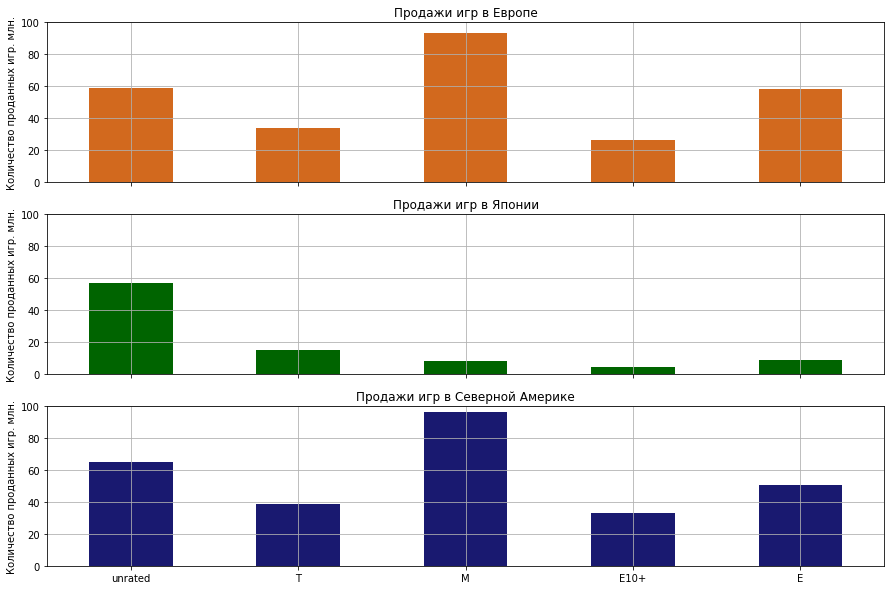

In [92]:
(
    data_actual.pivot_table(index='rating', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum').
    sort_values('rating', ascending=False).
    rename(
        columns={
            'eu_sales': 'Продажи игр в Европе',
            'na_sales': 'Продажи игр в Северной Америке',
            'jp_sales': 'Продажи игр в Японии'
        }
    ).
    plot(
        kind='bar',
        figsize=(15,10),
        legend=False,
        color=['#D2691E', '#006400', '#191970'],
        rot=0,
        subplots=True,
        grid=True,
        xlabel='',
        ylabel='Количество проданных игр. млн.',
        ylim=(0,100)
    )
)
plt.show()

Четкой зависимости продаж от рейтинга не замечено. Данный рейтинг, по моему мнению, носит больше информационный характер, который описвает возрастные ограничения.

Изучив данные можно составить следующие портреты пользователей в каждом регионе:
- Европа - пользователь данного региона предпочитает станционарные приставки, в основном приоритет на семейство PS. Популярные жанры Action, Sport и Shooter;
- Северная Америка - портрет пользователя очень схож с европейским, за исключением консоли. Тут предпочтения отдают приставке X360;
- Япония - в данном регионе портрет пользователя совершенно отличается от двух других. Здесь преобладают портативные консоли, ввиду жизненного образа японцев. Также отличаются и жанры, которые предпочитают игроки - Role-Playing и Action занимают лидирующие места. На третьем месте жанр "Разные".

## Гипотезы

В данном разделе мы проверим следующие гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки данных гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам воспользуемся методом `scipy.stats.ttest_ind`. Для этого избавимся от пропусков в таблице с актуальными данными.

In [93]:
data_hypothesis = data_actual.dropna() # Данные без пропусков сохраним в новую переменную

In [94]:
data_hypothesis.info() # Посмотрим на результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 42 to 16418
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             704 non-null    object 
 1   platform         704 non-null    object 
 2   year_of_release  704 non-null    Int64  
 3   genre            704 non-null    object 
 4   na_sales         704 non-null    float64
 5   eu_sales         704 non-null    float64
 6   jp_sales         704 non-null    float64
 7   other_sales      704 non-null    float64
 8   critic_score     704 non-null    Int64  
 9   user_score       704 non-null    float64
 10  rating           704 non-null    object 
 11  ttl_sales        704 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 72.9+ KB


Проверим гипотезу о равенстве средних пользовательских рейтингах платформ Xbox One и PC. 

In [95]:
xone = data_hypothesis[data_hypothesis['platform'] =='XOne']['user_score']
pc = data_hypothesis[data_hypothesis['platform'] =='PC']['user_score']

results = st.ttest_ind(
    xone,
    pc,
    equal_var=False # Указываем False, так как  можно предположить,что выборки разного размера
)
   

alpha = .01 # Так как объем выборки достаточно большой, то примем критический уровень значимости 0.01
# если p-value окажется меньше него - отвергнем гипотезу

display(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

'p-значение: 0.1403785186826978'

Не получилось отвергнуть нулевую гипотезу


Из полученного теста можно предположить, что средние пользовательские оценки на платформах Xbox One и PC не одинаковые в генеральной совокупности.

Теперь проверим, что средние пользовательские рейтинги жанров Action и Sports разные. Следовательно нулевая гипотеза - это то, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Алтернативная - разные.

In [96]:
action = data_hypothesis[data_hypothesis['genre'] =='Action']['user_score']
sports = data_hypothesis[data_hypothesis['genre'] =='Sports']['user_score']

results = st.ttest_ind(
    action,
    sports,
    equal_var=False # Указываем False, так как  можно предположить,что выборки разного размера
)
   

alpha = .01 # Так как объем выборки достаточно большой, то примем критический уровень значимости 0.01
# если p-value окажется меньше него - отвергнем гипотезу

display(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

'p-значение: 8.327612976032047e-09'

Отвергаем нулевую гипотезу


Из полученного теста можно предположить, что средние пользовательские оценки жанров Action и Sports одинаковые в генеральной совокупности.

## Вывод

В данном проекте перед нами стояла задача изучить исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для начала мы ознакомились с предоставленными нам данными. Далее данные прошли предобработку, а именно:
- изучив информацию о датафрейме, мы изменили типы данных, для удобства работы с ними;
- проверили датафрейм на наличие пропусков, где некоторые данные были удалены, некоторые были восстановлены, но в некоторых столбцах обработать пропуски не получилось, так как это могло повлечь за собой неверный анализ данных;
- также изучили данные на наличие дубликатов и аномальных значений.

Для проведения исследовательского анализа мы взяли данные за актуальный для нас период времени. В нашем случае выбор пал на период с 2000 года, когда продажи игр явно выросли и сама индустрия начала быстрее развиваться. Изучив актуальный период, мы получили следующие результаты:
- жизненный цикл игровой приставки в среднем составляет 10 лет;
- потенциально прибильные платформы - PS4, XOne, PC
- по общему количеству проданных игр среди потенциальных платформ лидирует PS4, хотя в среднем по проданным копиям XOne не отстает. Но тут также важно учитывать, что на PS4 выпускают больше игр;
- также выяснили, что оценки пользователей и критиков никак не влияют на продажи игр;
- среди жанров игр `Shooter` - самый прибыльный.

Также мы составили портрет пользователя в каждом регионе:
1. В Европе пользователи предпочитают станционарные приставки, в основном приоритет на семейство PS. Популярные жанры Action, Sport и Shooter;
2. В Северной Америке портрет пользователя очень схож с европейским, за исключением того, что тут более популярная консоль X360;
3. В Япония портрет пользователя совершенно отличается от двух других. Здесь преобладают портативные консоли, ввиду жизненного образа японцев. Также отличаются и жанры, которые предпочитают игроки - Role-Playing и Action.

Также мы проверили гипотезы равентсва средних пользовательских оценок на платформах и жанрах.

После проделанной работы можно сделать следующий вывод: потенциально популярный продукт зависит от множества факторов, например, тип платформы, регион, жанр, эксклюзивность, ну и конечно же регион. Если рекламную кампанию планировать в Японии, то упор необходимо делать на игры для портативных приставок в жанре Role-Playing и Action. Если брать в расчет Северную Америку или Европу, то тут выбор падает на 2 консоли - PS4 И XOne, но PS в приоритете. Что касается жанров, то упор нужно делать на Action, Sports и Shooter. Если брать общую оценку по миру, не углубляясь в регионы, самая распространненая приставка - PS4, на которую следует сделать упор, а среди жанров самым прибыльным можно считать - Shooter. Но также важно понимать, что не все игры Shooter прибыльные, например, между Noname Шутером или Fifa, конечно нужно больше рекламировать футбол, так как это популярная игра, на все времена.
Рекламную кампанию необходимо планировать распределеяя бюджет между разными жанрами и платформами. Только грамотный сплит поможет эффективно провести рекламние кампании.